In [20]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
#importing csv file for miniproject
df = pd.read_csv('/Users/Christie/Downloads/2016.csv')

1. High Level View


The dataset represented different countries from different regions and their economy, happiness, life expectancy, generosity, family, freedom, and their trush to government. They are basically an overview to quality of life in these different countries and how satisfied people in these countreis generally are. This dataset could help us understand the link between GDP and happiness, or GDP and life expectancy, and many more. We can also see if the Generosity is linked with trusting the government. This helps us understand more about what people value in their quality of life. 

In [22]:
#viewing first 10 rows of dataset
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


2. Preliminary Exploration

In [23]:
#checking for missing values
df.isnull().sum()
df.isna().sum()
#no missing values are present, not much noise, label are correct

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [27]:
#seeing summary statistics, only useful for economy or average members in the household etc.
df.describe()


,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

<Axes: xlabel='Happiness Score', ylabel='Region'>

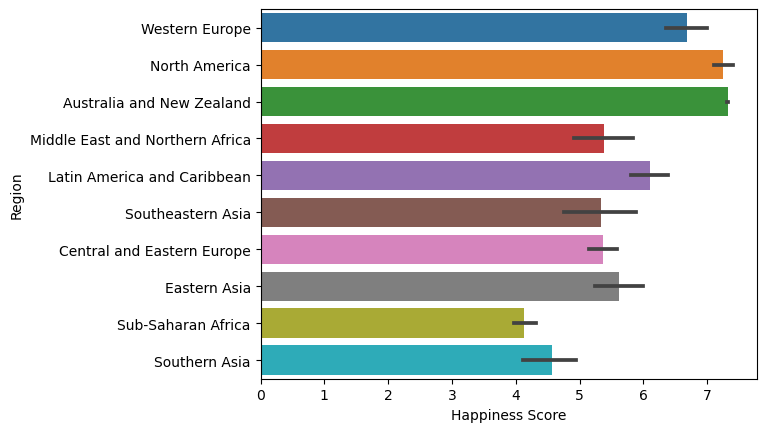

In [77]:
#bar graph showing of distribution of happiness score across different regions
sns.barplot(data=df, y="Region", x="Happiness Score", orient="h")

#I am exploring the data with region instead of country to get a general idea

array([[1.        , 0.58837678],
       [0.58837678, 1.        ]])

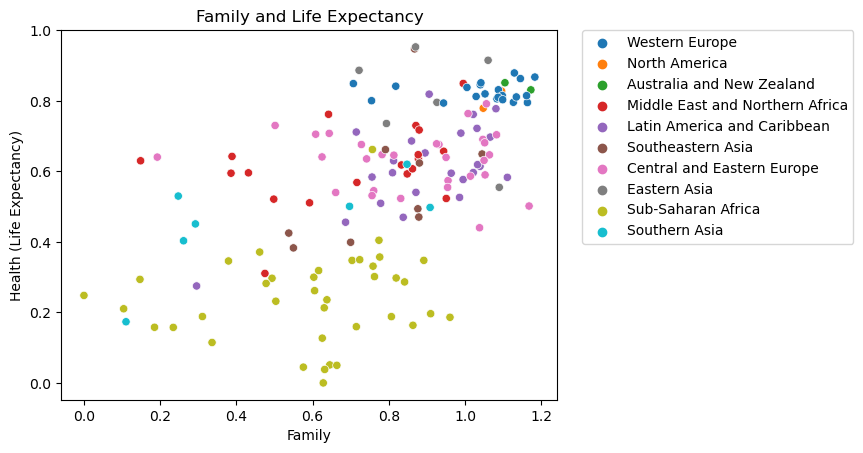

In [105]:
#scatterplot to see relation between freedom and geographic location
#explore the relationship between freedom and happiness


sns.scatterplot(data=df, x="Family", y="Health (Life Expectancy)",hue="Region").set(title='Family and Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
np.corrcoef(df.Family, df["Health (Life Expectancy)"])

3. Defining Objectives: 
Further explore the relationship between economy, happiness, life expectancy, and freedom. It would be interesting to see if better economy means people feel that they have more freedom to live and make choices, the impact of economy on life expectancy and happiness. 

Objective #1: Exploring what is the relationship between ecnonomy and health. Does increased wealth leads to a longer life expectancy? Is the geographic area relevant? If we look at the life expectancy by regions, which are the leading ones?

array([[1.        , 0.83706723],
       [0.83706723, 1.        ]])

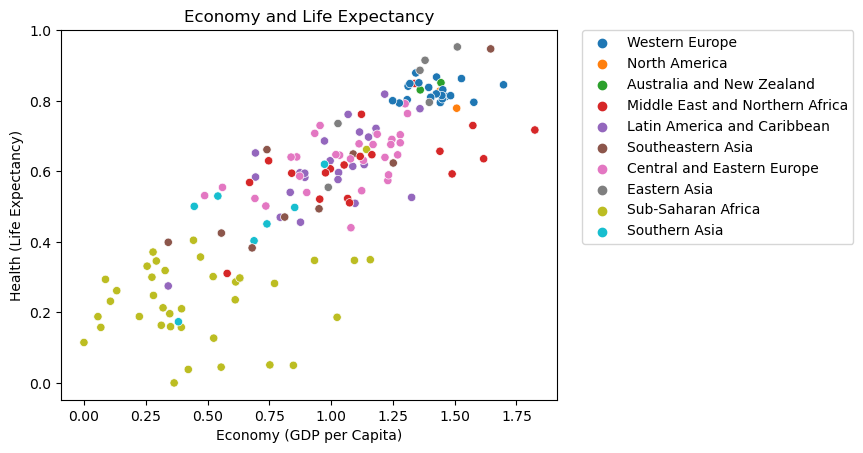

In [31]:
#let's take a look at economy and health
sns.scatterplot(data=df, x="Economy (GDP per Capita)", y="Health (Life Expectancy)",hue="Region").set(title='Economy and Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
np.corrcoef(df["Economy (GDP per Capita)"], df["Health (Life Expectancy)"])

Through exploring this data through a scatterplot, it can be seen that there is a positive correlation between economy and life expectancy, the higher the GDP per capita, the higher the life expectancy. The pearson correlation coefficient of 0.84 states the same. From the graph we can we see the sub-saharan African region seem to have a lower life expectancy and lower economy and the aggregate at the bottom left of the graph. The western Europe area aggregate at the top, while the central and easter Europe are scattered in the middle. There is an southeastern Asian country at the top, and North America region is towards the top as well. This data corresponds to our common knowledge of first-world countries tends to have better economy and life expectancies. On the bar graph below, we countinue to explore the same data but in a more direct visualization to see them side by side. And they seem to be telling the same story

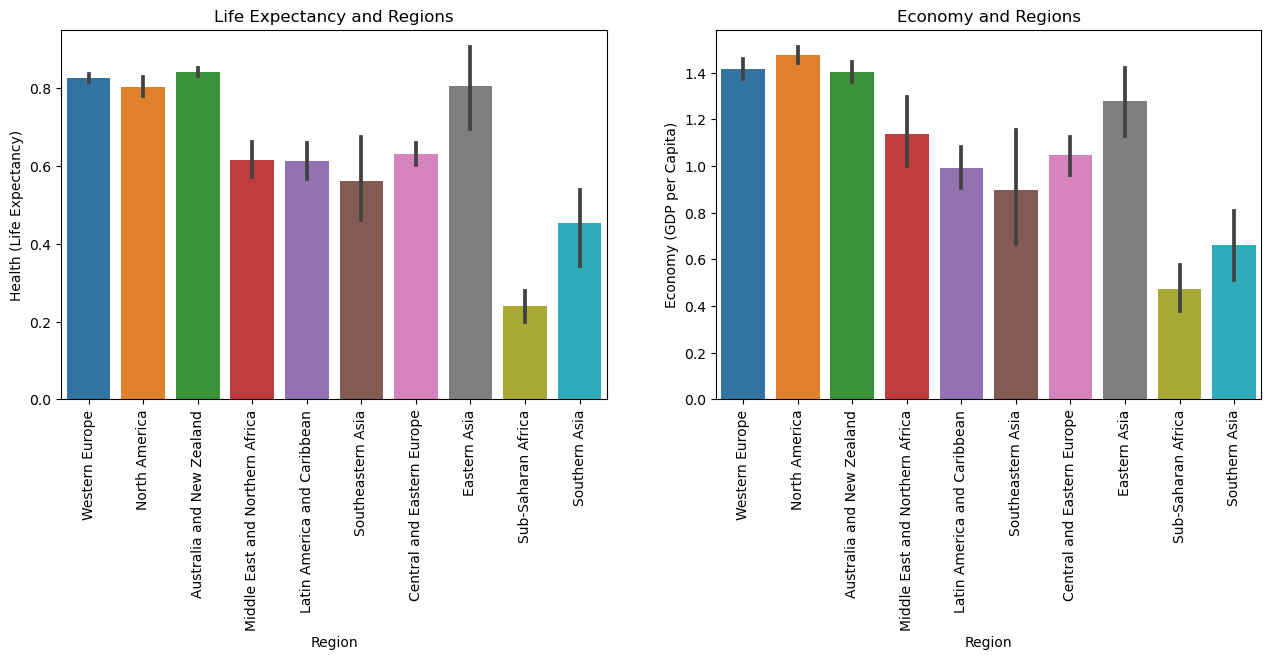

In [112]:
fig, ax =plt.subplots(1,2)
sns.barplot(data=df, x="Region", y="Health (Life Expectancy)", orient="v", ax=ax[0]).set(title='Life Expectancy and Regions')
sns.barplot(data=df, x="Region", y="Economy (GDP per Capita)", orient="v", ax=ax[1]).set(title='Economy and Regions')
ax[0].tick_params(axis="x", rotation=90)
ax[1].tick_params(axis="x", rotation=90)
fig.subplots_adjust(right = 2)

Objective #2: Western countries typically are addressed as free countries and have democratic governing bodies. We are going to explore this with the data provided. By geographic area, do westerners see themselves as free? Does this have a postive or negative correlation with their trust in government?

array([[1.        , 0.50205397],
       [0.50205397, 1.        ]])

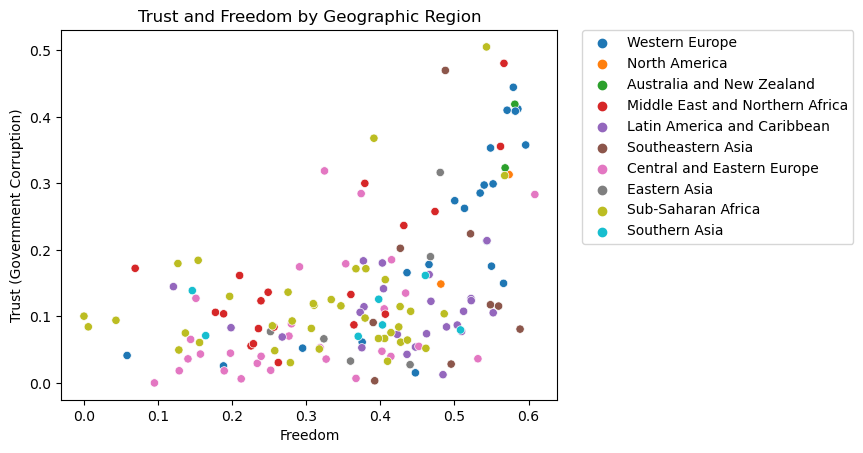

In [118]:
sns.scatterplot(data=df, x="Freedom", y="Trust (Government Corruption)",hue="Region").set(title='Trust and Freedom by Geographic Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
np.corrcoef(df["Freedom"], df["Trust (Government Corruption)"])

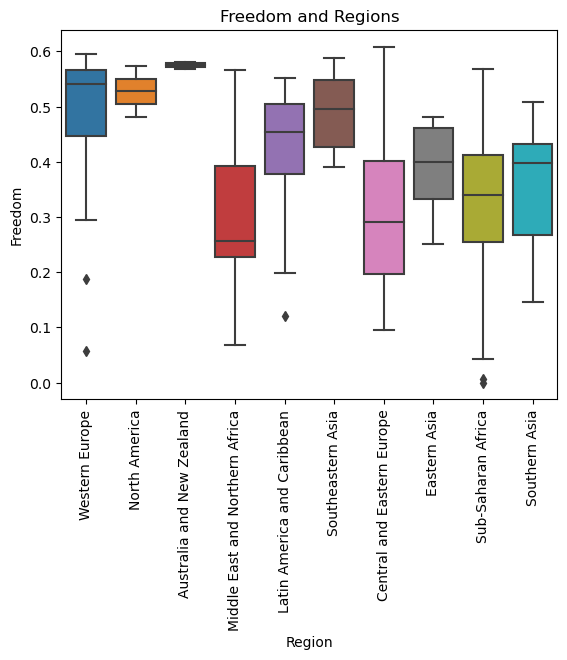

In [128]:
sns.boxplot(data=df, x="Region", y="Freedom").set(title='Freedom and Regions')
plt.tick_params(axis="x", rotation=90)

Trust and freedom have a low positive correlation. These data tells us that Western Europe, North America, Australia and New Zealand, Southeastern Asia are seen to have higher freedom by their people, but when we look at the trust versus freedom, there are no correlation at all. So whether people feel that they have freedom have no ties to their trust in absentee of government corruption and trust of their freedom. In the other chart we can see that countries that are historically seen as "Western" or free countries do score higher in freedom. 

Objective #3: Economy and generosity. Are people who are financially more well off more likely to do charitable acts, such as donating and helping strangers? 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([[ 1.        , -0.02553066],
       [-0.02553066,  1.        ]])

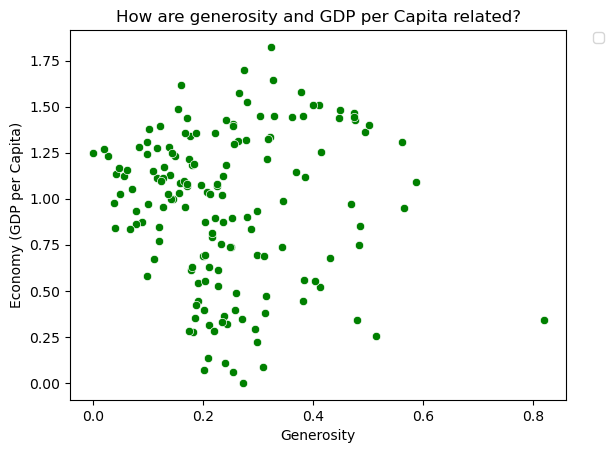

In [141]:
sns.scatterplot(data=df, x="Generosity", y="Economy (GDP per Capita)", color="green").set(title='How are generosity and GDP per Capita related?')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.12)
np.corrcoef(df["Generosity"], df["Economy (GDP per Capita)"])

The pearson correlation coefficient of close to zero tells us there is a neglible or no correlation between economy and generosity. This tell us that how people are doing financially really has nothing to do with their economic status. 

5. Ethics

This data was obtained through survey so I don't find it unethical. Also, through analyzing the data, we can find trends that are interesting that in no way harms participants of this report. But other things that I have considered if there are potential biases in the data. Since the sources of how surveys are conducted are not clear, it is highly possible that there are biases. For example, in more conservative or less free countries, how can I ensure that the answers are based off of free will. Also, the standards of living varies greatly from country to country, even given a similar GDP per capita the quality of life could vary greatly. Happiness goes by similarly, it is extremely subjective and hard to measure in an objective way or standard. 